# NESDE vs. LSTM

In [1]:
# Auto reload
%reload_ext autoreload
%autoreload 2

import pickle as pkl
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import NESDE_SDE
from NESDE import general_utils as utils

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)
torch.set_printoptions(linewidth=150)

In [2]:
# TRAIN
n_train = [100]
ts = [int(0.8*n) for n in n_train]
vs = [int(0.2*n) for n in n_train]
bs = 20
n_epochs_max = 800

# TEST
n_test = N_TEST = 1000

Train NESDE:


Dataloader - 1000 trajectories: 0-80 train, 80-100 valid, 1000-1000 test.
[validation] epoch 00:	NLL=4.4738	MSE=3.9916	(5s)
[validation] epoch 10:	NLL=2.1586	MSE=3.4783	(50s)
[validation] epoch 20:	NLL=2.0733	MSE=3.2050	(94s)
[validation] epoch 30:	NLL=2.0459	MSE=3.0302	(136s)
[validation] epoch 40:	NLL=1.9648	MSE=2.8361	(178s)
[validation] epoch 50:	NLL=1.8533	MSE=2.6134	(222s)
[validation] epoch 60:	NLL=1.7489	MSE=2.3854	(267s)
[validation] epoch 70:	NLL=1.6576	MSE=2.1552	(311s)
[validation] epoch 80:	NLL=1.6043	MSE=1.9654	(358s)
[validation] epoch 90:	NLL=1.5037	MSE=1.7697	(403s)
[validation] epoch 100:	NLL=1.4324	MSE=1.6256	(450s)
[validation] epoch 110:	NLL=1.3763	MSE=1.4989	(494s)
[validation] epoch 120:	NLL=1.3475	MSE=1.3786	(540s)
[validation] epoch 130:	NLL=1.2954	MSE=1.2816	(583s)
[validation] epoch 140:	NLL=1.2351	MSE=1.1837	(627s)
[validation] epoch 150:	NLL=1.1753	MSE=1.0978	(671s)
[validation] epoch 160:	NLL=1.1390	MSE=1.0122	(713s)
[validation] epoch 170:	NLL=1.0924	MSE

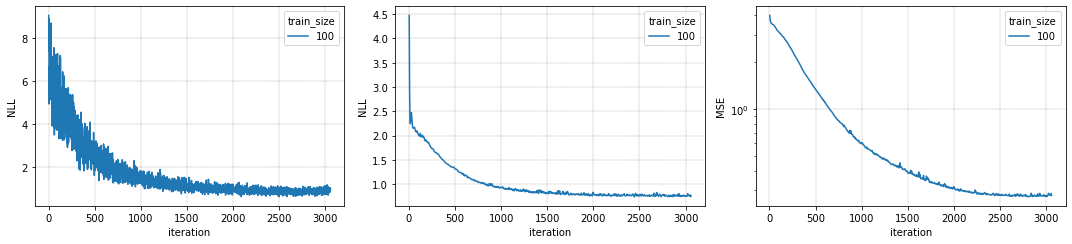

In [71]:
%%time
res0c, res_per_t0c = NESDE_SDE.run_multi_experiments(
    len(n_train), train_size=ts, valid_size=vs, test_size=n_test, train_by_nll=False, valid_by_nll=False, stationary_model=True,
    n_epochs=n_epochs_max, patience=60, batch_size=bs, gamma=1, lr=3e-3,
    device='cuda', n_seeds=1, sep_datasets=False,
    data_path="./Data/SDE_control_complex",
    outs_path="./results_NESDE/nodecay_",
    plot=False, plot_res=0.05)

axs = utils.Axes(3,3)
tt = pd.DataFrame()
for n in n_train:
    with open(f'results_NESDE/nodecay_n{n:d}_results_0.pkl','rb') as h:
        rr = pkl.load(h)
        tr = rr['train_summary']
        tr['train_size'] = str(n)
        tt = pd.concat((tt,tr))
sns.lineplot(data=tt[tt.group=='train'], x='iteration', hue='train_size', y='NLL', ax=axs[0])
sns.lineplot(data=tt[tt.group!='train'], x='iteration', hue='train_size', y='NLL', ax=axs[1])
sns.lineplot(data=tt[tt.group!='train'], x='iteration', hue='train_size', y='MSE', ax=axs[2])
axs[2].set_yscale('log')
plt.tight_layout();

LSTMs:

In [81]:
%%time

res_lstm, res_per_t_lstm = pd.DataFrame(), pd.DataFrame()
for sparsity in (1,8,50,250):
    dt = 1000 // sparsity

    res_lstm2, res_per_t_lstm2 = NESDE_SDE.run_multi_experiments(
        len(n_train), train_size=ts, valid_size=vs, test_size=n_test, const_steps_res=dt, lstm=True,
        n_epochs=n_epochs_max, patience=60, batch_size=bs, gamma=1, lr=3e-3,
        device='cuda', n_seeds=1, sep_datasets=False,
        data_path="./Data/SDE_control_complex",
        outs_path=f"./results_NESDE/sp{sparsity:d}_",
        plot=False, plot_res=0.05, Tmin=Tmin, n_samp_per_traj=n_samples_per_traj)
    
    res_lstm2['model'] = f'LSTM (1:{sparsity})'
    res_per_t_lstm2['model'] = f'LSTM (1:{sparsity})'
    res_lstm = pd.concat((res_lstm, res_lstm2))
    res_per_t_lstm = pd.concat((res_per_t_lstm, res_per_t_lstm2))


Loaded data with subsampling 1:1000. 11/11=100.0% of the points are observable.
1000 {'obs': torch.Size([11, 1]), 'times': torch.Size([11, 1]), 'U': torch.Size([11]), 'mask': torch.Size([11, 1])}
Dataloader - 1000 trajectories: 0-80 train, 80-100 valid, 1000-1000 test.
[validation] epoch 00:	MSE=2.0607	EV=-7.05%	(0s)
[validation] epoch 10:	MSE=0.6769	EV=64.84%	(2s)
[validation] epoch 20:	MSE=0.3570	EV=81.45%	(4s)
[validation] epoch 30:	MSE=0.2818	EV=85.36%	(6s)
[validation] epoch 40:	MSE=0.2515	EV=86.93%	(8s)
[validation] epoch 50:	MSE=0.2456	EV=87.24%	(10s)
[validation] epoch 60:	MSE=0.2432	EV=87.37%	(12s)
[validation] epoch 70:	MSE=0.2422	EV=87.42%	(14s)
[validation] epoch 80:	MSE=0.2419	EV=87.43%	(16s)
[validation] epoch 90:	MSE=0.2411	EV=87.47%	(18s)
[validation] epoch 100:	MSE=0.2421	EV=87.42%	(19s)
[validation] epoch 110:	MSE=0.2428	EV=87.39%	(21s)
[validation] epoch 120:	MSE=0.2432	EV=87.37%	(23s)
[validation] epoch 130:	MSE=0.2445	EV=87.30%	(25s)
[validation] epoch 140:	MSE=0.

Analysis:

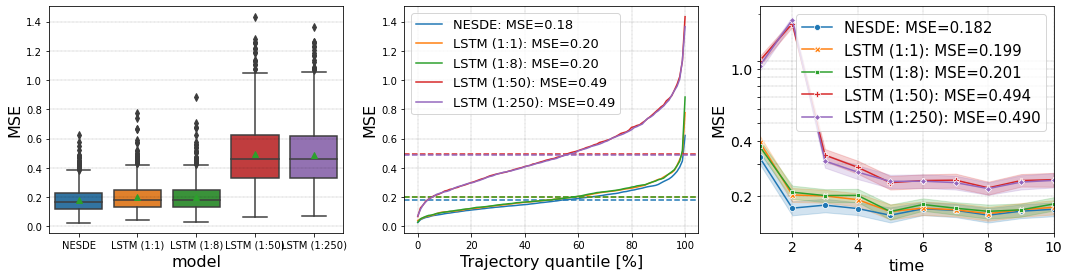

In [130]:
res_per_t0c['model'] = 'NESDE'
res0c['model'] = 'NESDE'

res_per_t = pd.concat((res_per_t0c,res_per_t_lstm))
res = pd.concat((res0c,res_lstm))
models = []
for m in res.model.values:
    if m not in models:
        models.append(m)

axs = utils.Axes(3,3,(5,4),fontsize=16)
a = 0

sns.boxplot(data=res, x='model', y='MSE', showmeans=True, ax=axs[a])
axs.labs(a, 'model', 'MSE')
a += 1

for model in models:
    rr = res[res.model==model]
    lab = f'{model}: MSE={rr.MSE.mean():.2f}'
    utils.plot_quantiles(rr.MSE.values, showmeans=True, ax=axs[a], label=lab)
axs.labs(a, 'Trajectory quantile [%]', 'MSE')
axs[a].legend(fontsize=13)
a += 1

axs[a].tick_params(axis='x', labelsize=14)
sns.lineplot(data=res_per_t, hue='model', x='time', y='MSE', markers=True, dashes=False, style='model', ax=axs[a])
axs.labs(a, 'time', 'MSE')
axs[a].set_yscale('log')
axs[a].set_xlim((1,10))
# axs[a].set_ylim((0.1,None))
labels = [f'{model}: MSE={res[res.model==model].MSE.mean():.3f}' for model in models]
axs[a].legend(labels, fontsize=15)
axs[a].set_yticks(np.arange(0.2,1.2,0.1))
axs[a].set_yticklabels([(f'{np.round(i,1):.1f}' if np.round(i,1) in (0.2,0.4,1.0) else None) for i in np.arange(0.2,1.2,0.1)], fontsize=14)
a += 1

plt.tight_layout();

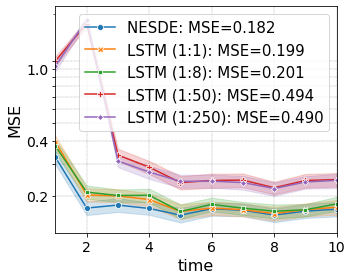

In [131]:
axs = utils.Axes(1,1,(5,4),fontsize=16)
a = 0

axs[a].tick_params(axis='x', labelsize=14)
sns.lineplot(data=res_per_t, hue='model', x='time', y='MSE', markers=True, dashes=False, style='model', ax=axs[a])
axs.labs(a, 'time', 'MSE')
axs[a].set_yscale('log')
axs[a].set_xlim((1,10))
# axs[a].set_ylim((0.1,None))
labels = [f'{model}: MSE={res[res.model==model].MSE.mean():.3f}' for model in models]
axs[a].legend(labels, fontsize=15)
axs[a].set_yticks(np.arange(0.2,1.2,0.1))
axs[a].set_yticklabels([(f'{np.round(i,1):.1f}' if np.round(i,1) in (0.2,0.4,1.0) else None) for i in np.arange(0.2,1.2,0.1)], fontsize=14)
a += 1

plt.tight_layout();
plt.savefig('res_LSTM_uni.png', bbox_inches='tight');

## Long-term prediction

Run test on multi-step prediction (notice the `Tmin=4`):

In [87]:
n_test = 1000

res2, res_per_t2 = NESDE_SDE.run_multi_experiments(
    len(n_train), train_size=80, valid_size=20, test_size=n_test, train_by_nll=False, valid_by_nll=False, stationary_model=True,
    n_epochs=n_epochs_max, patience=60, batch_size=bs, gamma=1, lr=3e-3,
    device='cuda', n_seeds=1, sep_datasets=False, do_train=False,
    data_path="./Data/SDE_control_complex",
    outs_path="./results_NESDE/nodecay_",
    plot=False, plot_res=0.05, Tmin=4, n_samp_per_traj=20)
res2['model'] = 'NESDE'
res_per_t2['model'] = 'NESDE'

for sparsity in (1,8,50,250):
    dt = 1000 // sparsity

    res_lstm3, res_per_t_lstm3 = NESDE_SDE.run_multi_experiments(
        len(n_train), train_size=80, valid_size=20, test_size=n_test, const_steps_res=dt, lstm=True,
        n_epochs=n_epochs_max, patience=60, batch_size=bs,
        device='cuda', n_seeds=1, sep_datasets=False, do_train=False,
        data_path="./Data/SDE_control_complex",
        outs_path=f"./results_NESDE/sp{sparsity:d}_",
        plot=False, plot_res=0.05, Tmin=4)
    
    res_lstm3['model'] = f'LSTM (1:{sparsity})'
    res_per_t_lstm3['model'] = f'LSTM (1:{sparsity})'
    res2 = pd.concat((res2, res_lstm3))
    res_per_t2 = pd.concat((res_per_t2, res_per_t_lstm3))



Dataloader - 1000 trajectories: 0-80 train, 80-100 valid, 1000-1000 test.
Test:	NLL=0.5331	MSE=0.1700	(34s)

Loaded data with subsampling 1:1000. 11/11=100.0% of the points are observable.
1000 {'obs': torch.Size([11, 1]), 'times': torch.Size([11, 1]), 'U': torch.Size([11]), 'mask': torch.Size([11, 1])}
Dataloader - 1000 trajectories: 0-80 train, 80-100 valid, 1000-1000 test.
Loaded data with subsampling 1:1000. 11/11=100.0% of the points are observable.
1000 {'obs': torch.Size([11, 1]), 'times': torch.Size([11, 1]), 'U': torch.Size([11]), 'mask': torch.Size([11, 1])}
Test:	MSE=0.4072	(1s)

Loaded data with subsampling 1:125. 11/81=13.6% of the points are observable.
1000 {'obs': torch.Size([81, 1]), 'times': torch.Size([81, 1]), 'U': torch.Size([81]), 'mask': torch.Size([81, 1])}
Dataloader - 1000 trajectories: 0-80 train, 80-100 valid, 1000-1000 test.
Loaded data with subsampling 1:125. 11/81=13.6% of the points are observable.
1000 {'obs': torch.Size([81, 1]), 'times': torch.Size([

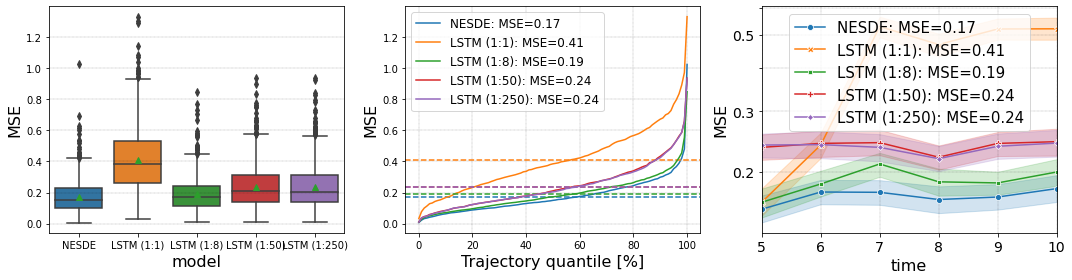

In [118]:
models = []
for m in res2.model.values:
    if m not in models:
        models.append(m)

axs = utils.Axes(3,3,(5,4),fontsize=16)
a = 0

sns.boxplot(data=res2, x='model', y='MSE', showmeans=True, ax=axs[a])
axs.labs(a, 'model', 'MSE')
a += 1

for model in models:
    rr = res2[res2.model==model]
    lab = f'{model}: MSE={rr.MSE.mean():.2f}'
    utils.plot_quantiles(rr.MSE.values, showmeans=True, ax=axs[a], label=lab)
axs.labs(a, 'Trajectory quantile [%]', 'MSE')
axs[a].legend(fontsize=12)
a += 1

axs[a].tick_params(axis='x', labelsize=14)
sns.lineplot(data=res_per_t2, hue='model', x='time', y='MSE', markers=True, dashes=False, style='model', ax=axs[a])
axs.labs(a, 'time', 'MSE')
axs[a].set_xlim((5,10))
labels = [f'{model}: MSE={res2[res2.model==model].MSE.mean():.2f}' for model in models]
axs[a].legend(labels, fontsize=15, loc='upper center')
axs[a].set_yscale('log')
axs[a].set_yticks([0.2,0.3,0.4,0.5,0.6])
axs[a].set_yticklabels(['0.2','0.3',None,'0.5',None], fontsize=14)
a += 1

plt.tight_layout();

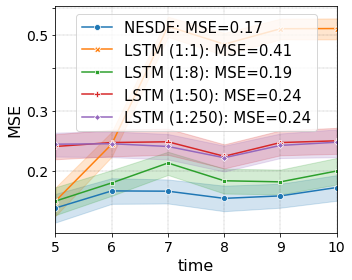

In [132]:
axs = utils.Axes(1,1,(5,4),fontsize=16)
a = 0

axs[a].tick_params(axis='x', labelsize=14)
sns.lineplot(data=res_per_t2, hue='model', x='time', y='MSE', markers=True, dashes=False, style='model', ax=axs[a])
axs.labs(a, 'time', 'MSE')
axs[a].set_xlim((5,10))
labels = [f'{model}: MSE={res2[res2.model==model].MSE.mean():.2f}' for model in models]
axs[a].legend(labels, fontsize=15, loc='upper center')
axs[a].set_yscale('log')
# axs[a].set_ylim((0.1,0.6))
axs[a].set_yticks([0.2,0.3,0.4,0.5,0.6])
axs[a].set_yticklabels(['0.2','0.3',None,'0.5',None], fontsize=14)
a += 1

plt.tight_layout();

plt.savefig('res_LSTM_multi.png', bbox_inches='tight');